# Kidney Disease Prediction

In [121]:
# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
sns.set()
plt.style.use('ggplot')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [122]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [123]:
# loading data

df= pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [124]:
df.shape

(1600, 26)

In [125]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [126]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [127]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [128]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,1564.000000,1552.000000,1412.000000,1416.000000,1404.000000,1424.000000,1524.000000,1532.000000,1252.000000,1248.000000,1392.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.153229,13.670397,0.005711,1.351244,1.098015,79.198098,50.453241,5.735498,10.396264,3.190060,2.909444
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,65.000000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1564 non-null   float64
 1   blood_pressure           1552 non-null   float64
 2   specific_gravity         1412 non-null   float64
 3   albumin                  1416 non-null   float64
 4   sugar                    1404 non-null   float64
 5   red_blood_cells          992 non-null    object 
 6   pus_cell                 1340 non-null   object 
 7   pus_cell_clumps          1584 non-null   object 
 8   bacteria                 1584 non-null   object 
 9   blood_glucose_random     1424 non-null   float64
 10  blood_urea               1524 non-null   float64
 11  serum_creatinine         1532 non-null   float64
 12  sodium                   1252 non-null   float64
 13  potassium                1248 non-null   float64
 14  haemoglobin             

In [130]:
#As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count' are object type. We need to change them to numerical dtype.
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1564 non-null   float64
 1   blood_pressure           1552 non-null   float64
 2   specific_gravity         1412 non-null   float64
 3   albumin                  1416 non-null   float64
 4   sugar                    1404 non-null   float64
 5   red_blood_cells          992 non-null    object 
 6   pus_cell                 1340 non-null   object 
 7   pus_cell_clumps          1584 non-null   object 
 8   bacteria                 1584 non-null   object 
 9   blood_glucose_random     1424 non-null   float64
 10  blood_urea               1524 non-null   float64
 11  serum_creatinine         1532 non-null   float64
 12  sodium                   1252 non-null   float64
 13  potassium                1248 non-null   float64
 14  haemoglobin             

In [132]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [133]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [134]:
#There is some ambugity present in the columns we have to remove that.

# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [135]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [136]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



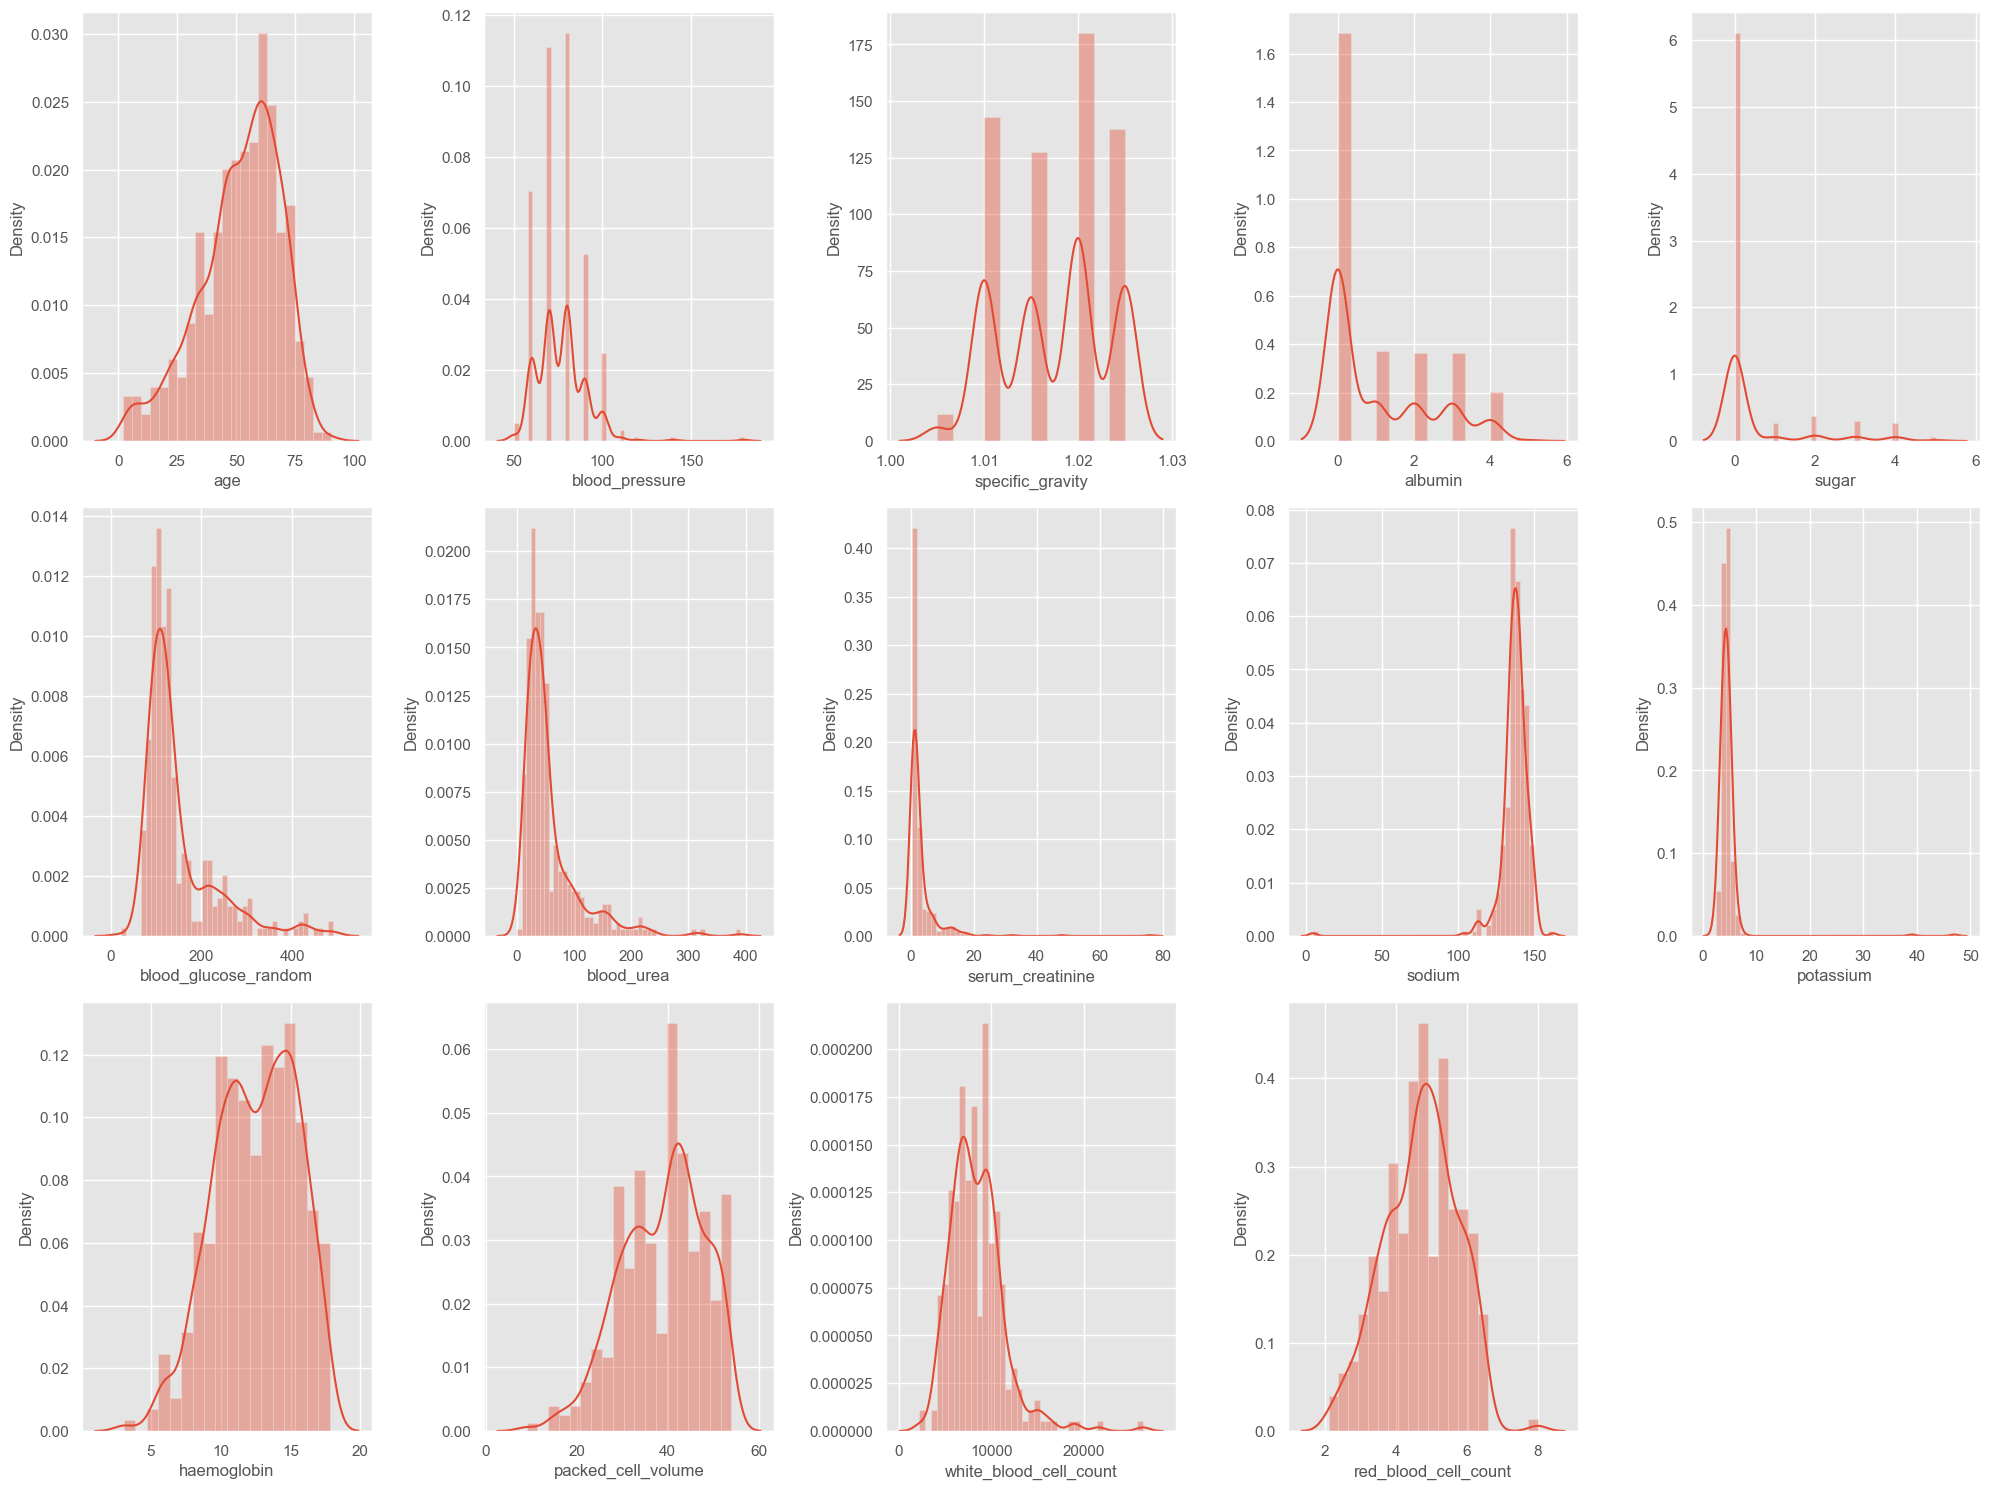

In [137]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

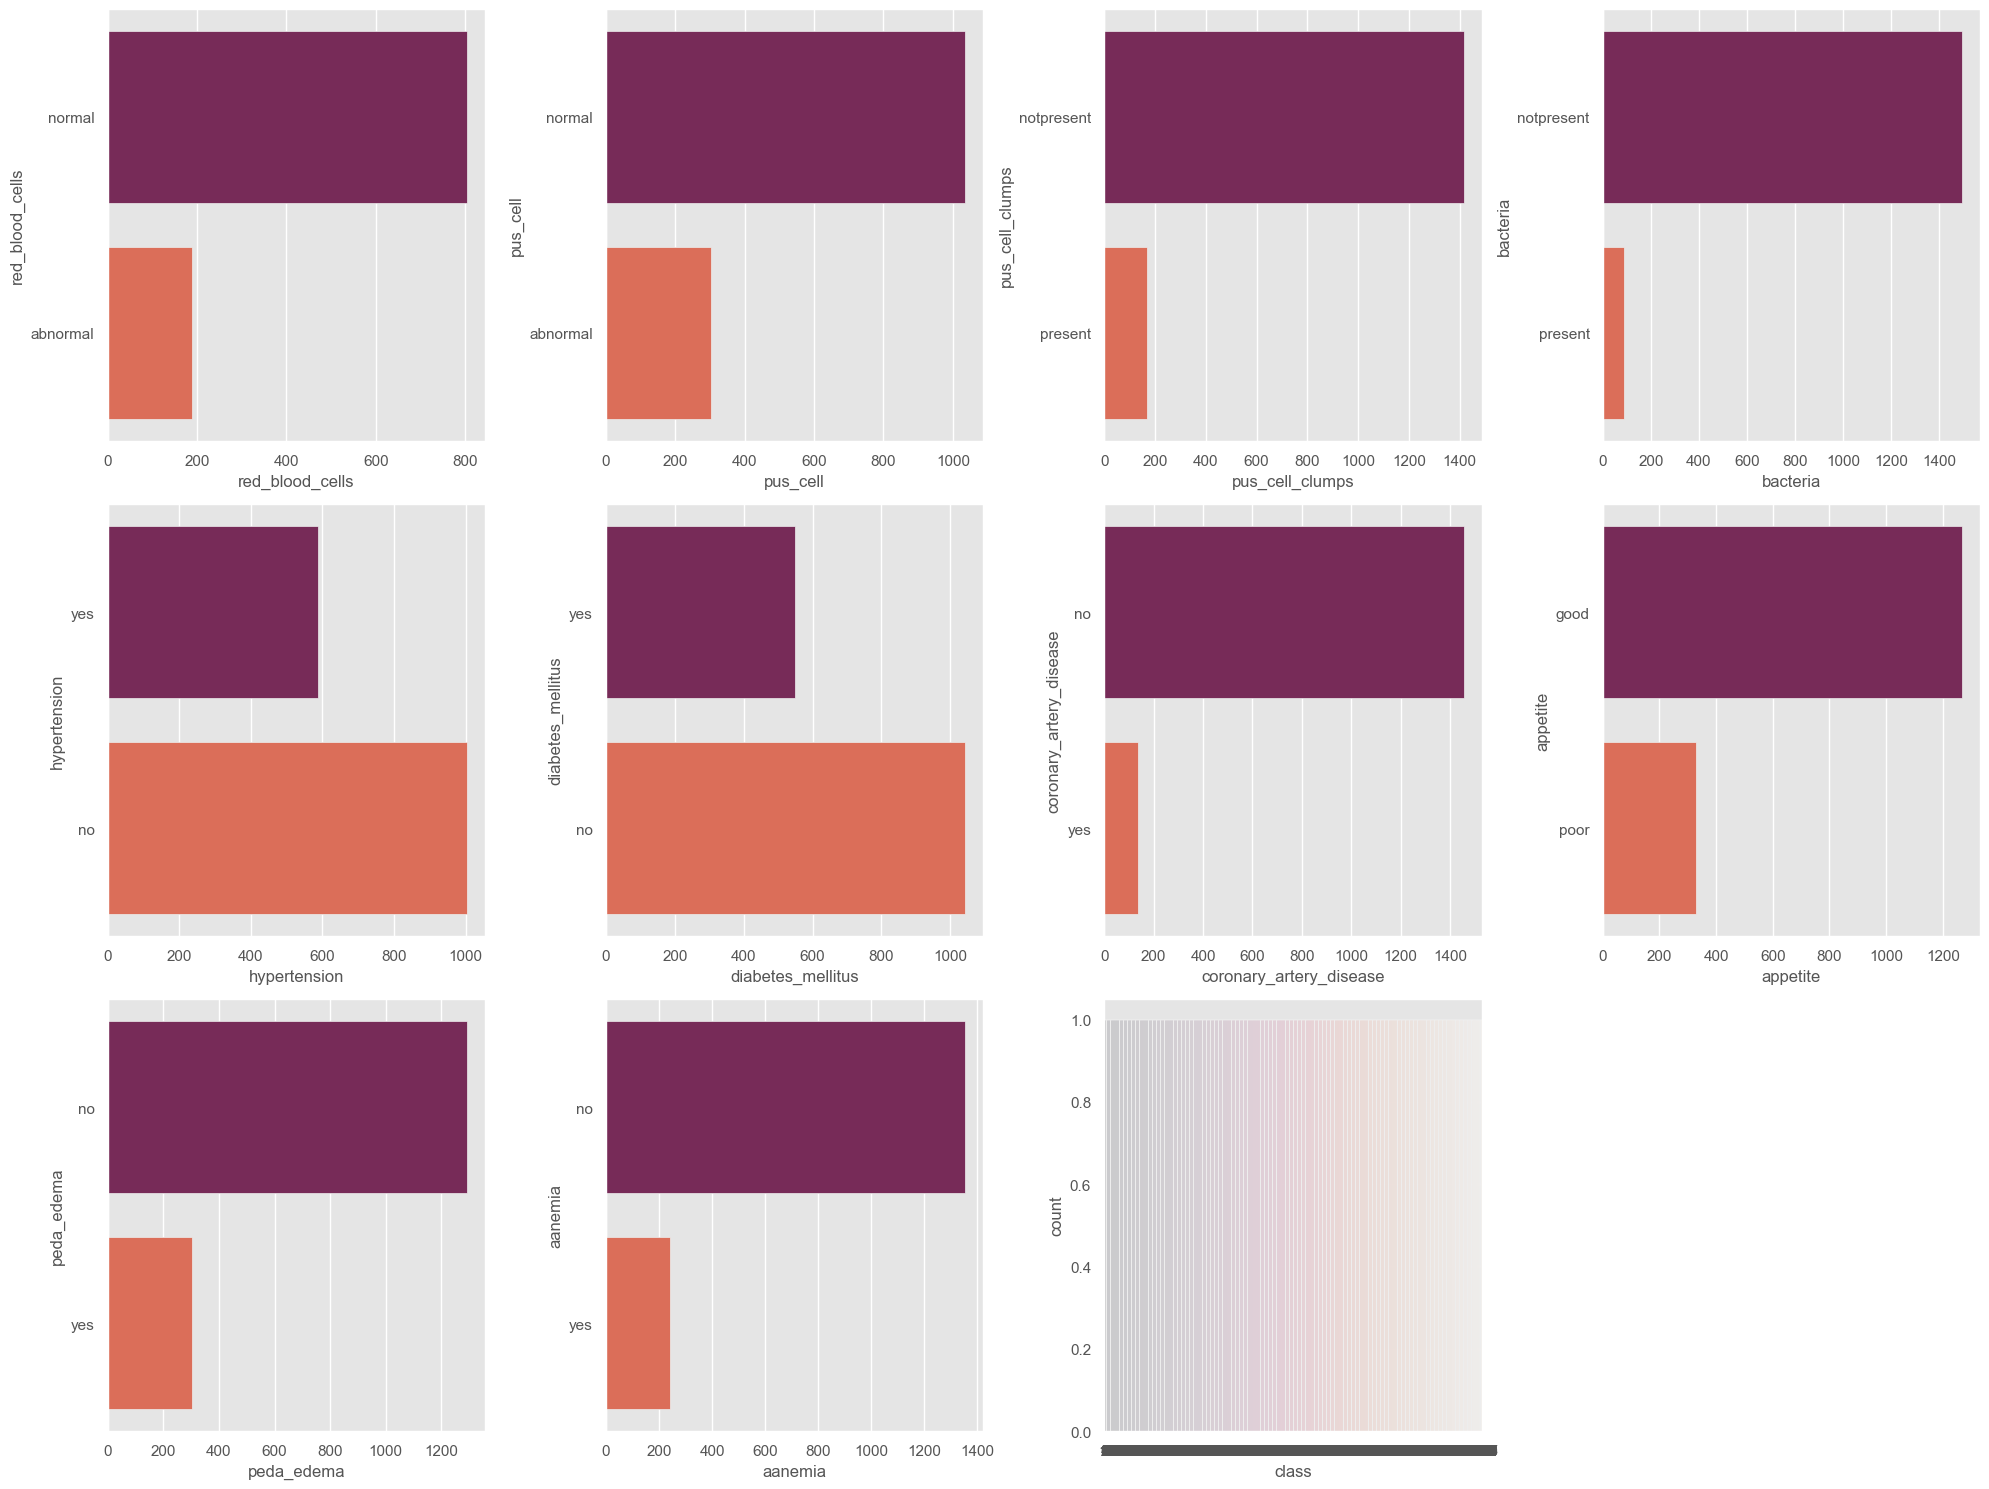

In [138]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Non-numeric columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


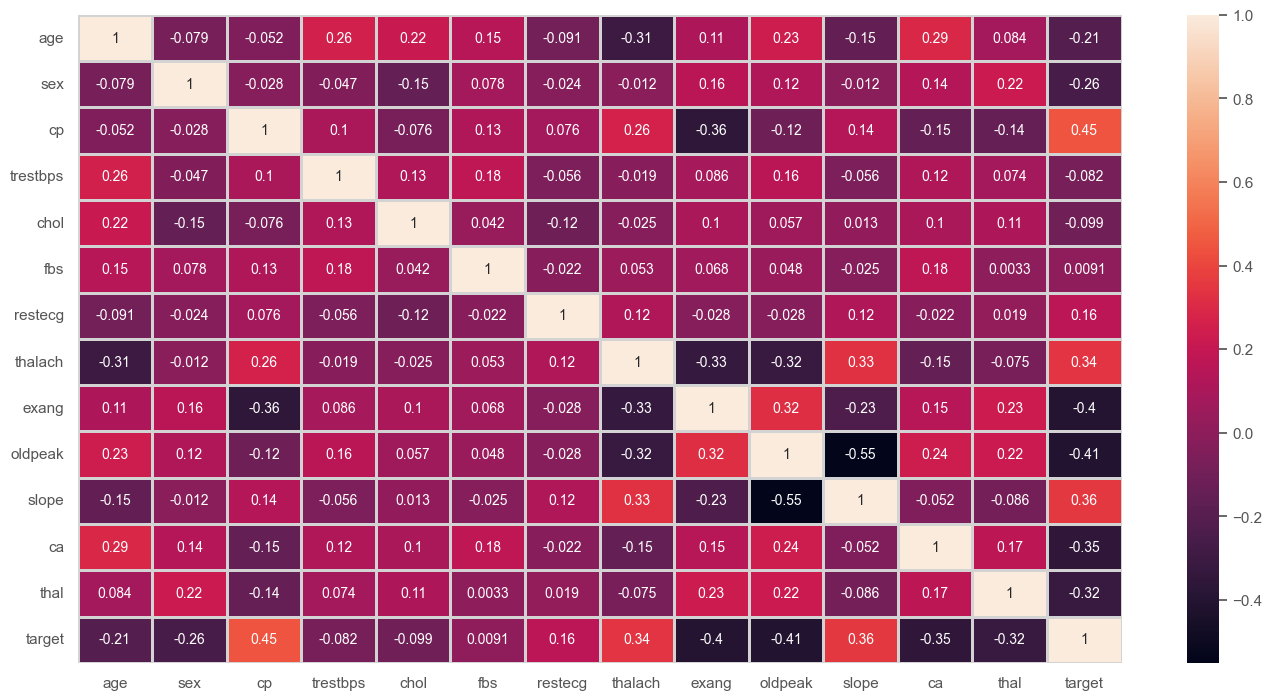

In [139]:
# heatmap of data

# plt.figure(figsize = (15, 8))

# sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
# plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your dataset (replace 'heart.csv' with your actual dataset)
df = pd.read_csv('heart.csv')

# Check for non-numeric columns
print("Non-numeric columns:", df.select_dtypes(exclude=['number']).columns)

# Convert categorical columns to numeric if needed
# Example: If there's a column with 'normal' and 'abnormal', we'll use LabelEncoder
for col in df.select_dtypes(include=['object']).columns:  # Loop through object type columns
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Now, we will select only numeric columns for the correlation matrix
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df_numeric.corr(), annot=True, linewidths=2, linecolor='lightgrey')
plt.show()


In [140]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# EXPLORATY DATA ANALYSIS (EDA)

In [141]:
# defining functions to create plot

def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()

In [143]:
# kde('red_blood_cell_count')

import seaborn as sns
import matplotlib.pyplot as plt

# Function to create KDE plot for a given column
def kde(col):
    # Ensure that 'target' is replaced with the correct column name
    if col in df.columns:  # Ensure the column exists in the dataframe
        grid = sns.FacetGrid(df, hue="target", height=6, aspect=2)  # Replace 'target' with the correct column name
        grid.map(sns.kdeplot, col)
        grid.add_legend()
        plt.show()
    else:
        print(f"Column '{col}' does not exist in the DataFrame.")

# Example usage of the function:
kde('red_blood_cell_count')  # Replace with your actual column name


Column 'red_blood_cell_count' does not exist in the DataFrame.


In [144]:
# kde('white_blood_cell_count')

import seaborn as sns
import matplotlib.pyplot as plt

# Function to create KDE plot for a given column
def kde(col):
    # Ensure that 'target' is replaced with the correct column name
    # If your target column is named 'target', keep it, otherwise replace it accordingly
    if col in df.columns:  # Ensure the column exists in the dataframe
        grid = sns.FacetGrid(df, hue="target", height=6, aspect=2)  # Replace 'target' with the correct column name
        grid.map(sns.kdeplot, col)
        grid.add_legend()
        plt.show()
    else:
        print(f"Column '{col}' does not exist in the DataFrame.")

# Example usage of the function:
kde('white_blood_cell_count')  # Replace with your actual column name



Column 'white_blood_cell_count' does not exist in the DataFrame.


In [145]:
kde('packed_cell_volume')

Column 'packed_cell_volume' does not exist in the DataFrame.


In [146]:
kde('haemoglobin')

Column 'haemoglobin' does not exist in the DataFrame.


In [147]:
kde('albumin')

Column 'albumin' does not exist in the DataFrame.


In [148]:
kde('blood_glucose_random')

Column 'blood_glucose_random' does not exist in the DataFrame.


In [149]:
kde('blood_urea')


Column 'blood_urea' does not exist in the DataFrame.


In [150]:
kde('specific_gravity')

Column 'specific_gravity' does not exist in the DataFrame.


# DATA PRE PROCESSING 

In [151]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [152]:
# df[num_cols].isnull().sum()
# Check the columns of the DataFrame
print("Columns in df:", df.columns)

# Check the columns in num_cols
print("Columns in num_cols:", num_cols)

# Filter out valid columns that exist in the DataFrame
valid_cols = [col for col in num_cols if col in df.columns]
print("Valid columns:", valid_cols)

# If there are valid columns, check the number of missing values
if valid_cols:
    print(df[valid_cols].isnull().sum())
else:
    print("No valid columns found in num_cols.")


Columns in df: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Columns in num_cols: ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
Valid columns: ['age']
age    0
dtype: int64


In [153]:
# df[cat_cols].isnull().sum()
# Check the actual columns in the DataFrame
print("Columns in df:", df.columns)

# Check the contents of cat_cols
print("Columns in cat_cols:", cat_cols)

# Filter out valid columns that exist in the DataFrame
valid_cat_cols = [col for col in cat_cols if col in df.columns]
print("Valid categorical columns:", valid_cat_cols)

# If valid columns are available, check the number of missing values
if valid_cat_cols:
    print(df[valid_cat_cols].isnull().sum())
else:
    print("No valid columns found in cat_cols.")


Columns in df: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Columns in cat_cols: ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']
Valid categorical columns: []
No valid columns found in cat_cols.


In [154]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [155]:
# filling num_cols null values using random sampling method

# for col in num_cols:
#     random_value_imputation(col)

# Step 1: Clean column names
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()

# Step 2: Print columns in DataFrame and num_cols
print("Columns in DataFrame:", df.columns)
print("Columns in num_cols:", num_cols)

# Step 3: Filter valid columns
valid_num_cols = [col for col in num_cols if col in df.columns]
print("Valid columns in num_cols:", valid_num_cols)

# Step 4: Impute missing values for valid columns
for col in valid_num_cols:
    random_value_imputation(col)


Columns in DataFrame: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Columns in num_cols: ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
Valid columns in num_cols: ['age']


In [156]:
# df[num_cols].isnull().sum()
# Step 1: Check the columns in the DataFrame
print("Columns in df:", df.columns)

# Step 2: Check the contents of num_cols
print("Columns in num_cols:", num_cols)

# Step 3: Filter valid columns
valid_num_cols = [col for col in num_cols if col in df.columns]
print("Valid columns in num_cols:", valid_num_cols)

# Step 4: Check for missing values in the valid columns
if valid_num_cols:
    print(df[valid_num_cols].isnull().sum())
else:
    print("No valid columns found in num_cols.")


Columns in df: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Columns in num_cols: ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
Valid columns in num_cols: ['age']
age    0
dtype: int64


In [157]:
# # filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

# random_value_imputation('red_blood_cells')
# random_value_imputation('pus_cell')

# for col in cat_cols:
#     impute_mode(col)
# Check columns in the DataFrame and cat_cols
print("Columns in df:", df.columns)
print("Columns in cat_cols:", cat_cols)

# Ensure that only valid columns in df are in cat_cols
cat_cols = [col for col in cat_cols if col in df.columns]
print("Valid categorical columns:", cat_cols)

# If "red_blood_cells" and "pus_cell" are in valid cat_cols, apply random value imputation
if 'red_blood_cells' in cat_cols:
    random_value_imputation('red_blood_cells')

if 'pus_cell' in cat_cols:
    random_value_imputation('pus_cell')

# Apply mode imputation to the rest of the categorical columns
for col in cat_cols:
    impute_mode(col)

Columns in df: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Columns in cat_cols: ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']
Valid categorical columns: []


In [158]:
df[cat_cols].isnull().sum()

Series([], dtype: float64)

#All the missing values are handeled now, lets do ctaegorical features encoding now

# FEATURE ENCODING

In [159]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

In [160]:
#As all of the categorical columns have 2 categories we can use label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [161]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,3,30,64,1,0,42,0,22,0,0,1,1
1,3,1,2,21,80,0,1,77,0,32,0,0,2,1
2,7,0,1,21,35,0,0,64,0,14,2,0,2,1
3,22,1,1,13,67,0,1,69,0,8,2,0,2,1
4,23,0,0,13,145,0,1,55,1,6,2,0,2,1


# MODEL BUILDING

In [162]:
# ind_col = [col for col in df.columns if col != 'class']
# dep_col = 'class'

# X = df[ind_col]
# y = df[dep_col]

# Assuming you find the correct column name for 'class', let's say it's 'target'
dep_col = 'target'

# Now assign X and y based on the correct column name
ind_col = [col for col in df.columns if col != dep_col]
X = df[ind_col]
y = df[dep_col]


In [163]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# KNN

In [164]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.9270588235294117
Test Accuracy of KNN is 0.8 

Confusion Matrix :- 
[[123  36   0]
 [ 35 169   0]
 [  2   0   0]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       159
           1       0.82      0.83      0.83       204
           2       0.00      0.00      0.00         2

    accuracy                           0.80       365
   macro avg       0.53      0.53      0.53       365
weighted avg       0.80      0.80      0.80       365



# DECISION TREE 

In [165]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 1.0 

Confusion Matrix :- 
[[159   0   0]
 [  0 204   0]
 [  0   0   2]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       204
           2       1.00      1.00      1.00         2

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



In [166]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [167]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.9788235294117646


In [168]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9905882352941177
Test Accuracy of Decision Tree Classifier is 0.989041095890411 

Confusion Matrix :- 
[[157   2   0]
 [  2 202   0]
 [  0   0   2]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       159
           1       0.99      0.99      0.99       204
           2       1.00      1.00      1.00         2

    accuracy                           0.99       365
   macro avg       0.99      0.99      0.99       365
weighted avg       0.99      0.99      0.99       365



# RANDOM FOREST

In [169]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', min_samples_leaf = 5, 
                                min_samples_split = 2, n_estimators = 400)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 0.9823529411764705
Test Accuracy of Random Forest Classifier is 0.9561643835616438 

Confusion Matrix :- 
[[154   5   0]
 [  9 195   0]
 [  2   0   0]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       159
           1       0.97      0.96      0.97       204
           2       0.00      0.00      0.00         2

    accuracy                           0.96       365
   macro avg       0.64      0.64      0.64       365
weighted avg       0.95      0.96      0.95       365



# XgBoost

In [170]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.001, max_depth = 10, n_estimators = 100)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 0.9905882352941177
Test Accuracy of XgBoost is 0.9561643835616438 

Confusion Matrix :- 
[[151   8   0]
 [  8 196   0]
 [  0   0   2]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       159
           1       0.96      0.96      0.96       204
           2       1.00      1.00      1.00         2

    accuracy                           0.96       365
   macro avg       0.97      0.97      0.97       365
weighted avg       0.96      0.96      0.96       365



# Logistic Regression

In [171]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [172]:
# model predictions

y_pred = lr.predict(X_test)

In [173]:
# accuracy score

print(accuracy_score(y_train, lr.predict(X_train)))

lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)

0.8294117647058824
0.8410958904109589


In [174]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[127  32   0]
 [ 24 180   0]
 [  2   0   0]]


In [175]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       159
           1       0.85      0.88      0.87       204
           2       0.00      0.00      0.00         2

    accuracy                           0.84       365
   macro avg       0.56      0.56      0.56       365
weighted avg       0.84      0.84      0.84       365



# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC(probability=True)
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svm, parameters)
grid_search.fit(X_train, y_train)

In [ ]:
# best parameters

grid_search.best_params_

In [91]:
grid_search.best_score_

np.float64(0.9717647058823529)

In [92]:
svm = SVC(C = 10, gamma = 0.001, probability=True)
svm.fit(X_train, y_train)

SVC(C=10, gamma=0.001, probability=True)

In [93]:
# model predictions 

y_pred = svm.predict(X_test)

In [94]:
# accuracy score

print(accuracy_score(y_train, svm.predict(X_train)))

svm_acc = accuracy_score(y_test, svm.predict(X_test))
print(svm_acc)

0.9482352941176471
0.9452054794520548


In [95]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[146  13   0]
 [  7 197   0]
 [  0   0   2]]


In [96]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       159
           1       0.94      0.97      0.95       204
           2       1.00      1.00      1.00         2

    accuracy                           0.95       365
   macro avg       0.96      0.96      0.96       365
weighted avg       0.95      0.95      0.95       365



# Gradient Boosting

In [98]:
# from sklearn.ensemble import GradientBoostingClassifier

# gbc = GradientBoostingClassifier()

# parameters = {
#     'loss': ['deviance', 'exponential'],
#     'learning_rate': [0.001, 0.1, 1, 10],
#     'n_estimators': [100, 150, 180, 200]
# }

# grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
# grid_search_gbc.fit(X_train, y_train)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the classifier
gbc = GradientBoostingClassifier()

# Corrected parameter grid
parameters = {
    'loss': ['log_loss', 'exponential'],  # Use 'log_loss' instead of 'deviance'
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

# GridSearchCV to find the best parameters
grid_search_gbc = GridSearchCV(gbc, parameters, cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search_gbc.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [99]:
# best parameters 

grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'log_loss', 'n_estimators': 180}

In [100]:
# best score

grid_search_gbc.best_score_

np.float64(0.9929411764705882)

In [102]:
# gbc = GradientBoostingClassifier(learning_rate = 1, loss = 'deviance', n_estimators = 150)
# gbc.fit(X_train, y_train)

from sklearn.ensemble import GradientBoostingClassifier

# Corrected parameter for 'loss'
gbc = GradientBoostingClassifier(learning_rate=1, loss='log_loss', n_estimators=150)
gbc.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=1, n_estimators=150)

In [103]:
y_pred = gbc.predict(X_test)

In [104]:
# accuracy score

print(accuracy_score(y_train, gbc.predict(X_train)))

gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

1.0
1.0


In [105]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[159   0   0]
 [  0 204   0]
 [  0   0   2]]


In [106]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       204
           2       1.00      1.00      1.00         2

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



# MODELS COMPARISON

In [107]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'XgBoost', 'Gradient Boosting'],
    'Score' : [lr_acc, knn_acc, svm_acc, dtc_acc, rd_clf_acc, xgb_acc, gbc_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
6,Gradient Boosting,1.000000
3,Decision Tree Classifier,0.978082
4,Random Forest Classifier,0.956164
5,XgBoost,0.956164
2,SVM,0.945205
0,Logistic Regression,0.841096
1,KNN,0.800000


In [109]:
import pickle
model = rd_clf
pickle.dump(model, open("kidney.pkl",'wb'))

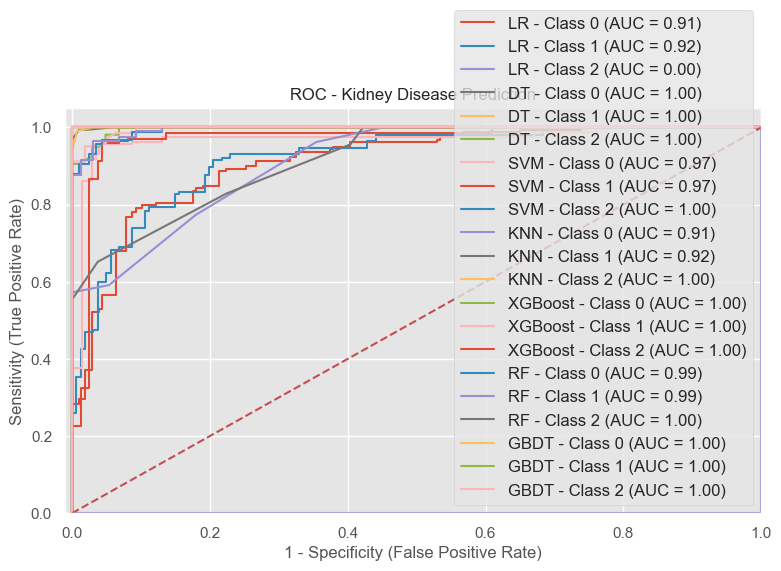

In [112]:
# from sklearn import metrics
# plt.figure(figsize=(8,5))
# models = [
# {
#     'label': 'LR',
#     'model': lr,
# },
# {
#     'label': 'DT',
#     'model': dtc,
# },
# {
#     'label': 'SVM',
#     'model': svm,
# },
# {
#     'label': 'KNN',
#     'model': knn,
# },
# {
#     'label': 'XGBoost',
#     'model': xgb,
# },
# {
#     'label': 'RF',
#     'model': rd_clf,
# },
# {
#     'label': 'GBDT',
#     'model': gbc,
# }
# ]
# for m in models:
#     model = m['model'] 
#     model.fit(X_train, y_train) 
#     y_pred=model.predict(X_test) 
#     fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
#     auc = metrics.roc_auc_score(y_test,model.predict(X_test))
#     plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([-0.01, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
# plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
# plt.title('ROC - Kidney Disease Prediction', fontsize=12)
# plt.legend(loc="lower right", fontsize=12)
# plt.savefig("outputs/roc_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
# plt.show()

from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
models = [
    {'label': 'LR', 'model': lr},
    {'label': 'DT', 'model': dtc},
    {'label': 'SVM', 'model': svm},
    {'label': 'KNN', 'model': knn},
    {'label': 'XGBoost', 'model': xgb},
    {'label': 'RF', 'model': rd_clf},
    {'label': 'GBDT', 'model': gbc}
]

for m in models:
    model = m['model']
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
    
    # Handling multiclass ROC
    fpr1 = {}
    tpr1 = {}
    auc = {}
    
    # Loop through each class and calculate the ROC curve for that class
    n_classes = len(set(y_train))  # Number of unique classes in the target variable
    for i in range(n_classes):
        fpr1[i], tpr1[i], thresholds = metrics.roc_curve(y_test == i, model.predict_proba(X_test)[:, i])
        auc[i] = metrics.roc_auc_score(y_test == i, model.predict_proba(X_test)[:, i])
        plt.plot(fpr1[i], tpr1[i], label='%s - Class %d (AUC = %0.2f)' % (m['label'], i, auc[i]))

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Kidney Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()


[84.11, 97.81, 94.52000000000001, 80.0, 95.62, 95.62, 100.0]
[np.float64(61.03333333333334), np.float64(99.96666666666665), np.float64(97.98333333333333), np.float64(94.32333333333334), np.float64(99.74666666666667), np.float64(99.65666666666668), np.float64(100.0)]


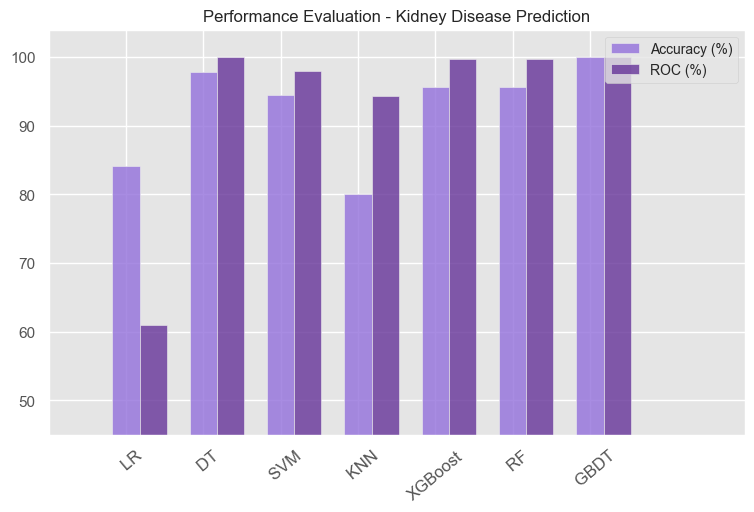

In [115]:
# from sklearn import metrics
# import numpy as np
# import matplotlib.pyplot as plt
# models = [
# {
#     'label': 'LR',
#     'model': lr,
# },
# {
#     'label': 'DT',
#     'model': dtc,
# },
# {
#     'label': 'SVM',
#     'model': svm,
# },
# {
#     'label': 'KNN',
#     'model': knn,
# },
# {
#     'label': 'XGBoost',
#     'model': xgb,
# },
# {
#     'label': 'RF',
#     'model': rd_clf,
# },
# {
#     'label': 'GBDT',
#     'model': gbc,
# }
# ]

# means_roc = []
# means_accuracy = [100*round(lr_acc,4), 100*round(dtc_acc,4), 100*round(svm_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
#                   100*round(rd_clf_acc,4), 100*round(gbc_acc,4)]

# for m in models:
#     model = m['model'] 
#     model.fit(X_train, y_train) 
#     y_pred=model.predict(X_test) 
#     fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
#     auc = metrics.roc_auc_score(y_test,model.predict(X_test))
#     auc = 100*round(auc,4)
#     means_roc.append(auc)

# print(means_accuracy)
# print(means_roc)

# # data to plot
# n_groups = 7
# means_accuracy = tuple(means_accuracy)
# means_roc = tuple(means_roc)

# # create plot
# fig, ax = plt.subplots(figsize=(8,5))
# index = np.arange(n_groups)
# bar_width = 0.35
# opacity = 0.8

# rects1 = plt.bar(index, means_accuracy, bar_width,
# alpha=opacity,
# color='mediumpurple',
# label='Accuracy (%)')

# rects2 = plt.bar(index + bar_width, means_roc, bar_width,
# alpha=opacity,
# color='rebeccapurple',
# label='ROC (%)')

# plt.xlim([-1, 8])
# plt.ylim([45, 104])

# plt.title('Performance Evaluation - Kidney Disease Prediction', fontsize=12)
# plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
# plt.legend(loc="upper right", fontsize=10)
# plt.savefig("outputs/PE_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
# plt.show()

from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

models = [
    {'label': 'LR', 'model': lr},
    {'label': 'DT', 'model': dtc},
    {'label': 'SVM', 'model': svm},
    {'label': 'KNN', 'model': knn},
    {'label': 'XGBoost', 'model': xgb},
    {'label': 'RF', 'model': rd_clf},
    {'label': 'GBDT', 'model': gbc},
]

means_roc = []
means_accuracy = [
    100 * round(lr_acc, 4), 
    100 * round(dtc_acc, 4), 
    100 * round(svm_acc, 4), 
    100 * round(knn_acc, 4), 
    100 * round(xgb_acc, 4), 
    100 * round(rd_clf_acc, 4), 
    100 * round(gbc_acc, 4)
]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
    
    # Initialize dictionaries to store fpr, tpr, and auc for each class
    fpr1 = {}
    tpr1 = {}
    auc = {}
    
    # Number of classes
    n_classes = len(np.unique(y_train))
    
    for i in range(n_classes):
        fpr1[i], tpr1[i], thresholds = metrics.roc_curve(y_test == i, model.predict_proba(X_test)[:, i])
        auc[i] = metrics.roc_auc_score(y_test == i, model.predict_proba(X_test)[:, i])
        auc[i] = 100 * round(auc[i], 4)
    
    # You can choose to plot or aggregate the auc values for each model
    means_roc.append(np.mean(list(auc.values())))  # Average AUC across all classes

print(means_accuracy)
print(means_roc)

# Data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width, alpha=opacity, color='mediumpurple', label='Accuracy (%)')
rects2 = plt.bar(index + bar_width, means_roc, bar_width, alpha=opacity, color='rebeccapurple', label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([45, 104])

plt.title('Performance Evaluation - Kidney Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost', '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()
